# Bibliotecas

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np



from sklearn.linear_model import SGDClassifier


# Baixar os Dados

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Separar Data do Target

In [4]:
X,y = mnist["data"], mnist["target"]

In [5]:
print('tamanho X', X.shape)
print('-------------------')
print('tamanho y', y.shape)

tamanho X (70000, 784)
-------------------
tamanho y (70000,)


In [6]:
X.iloc[[0],]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# visualização de uma variável aleatoria

## Campo da linha 1

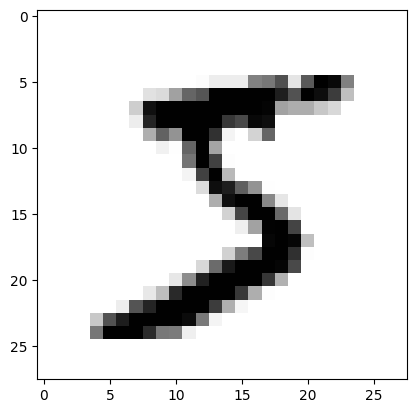

In [7]:
some_digit = X.iloc[[0],]
some_digit_image = some_digit.values.reshape((28, 28))
plt.imshow(some_digit_image, cmap = "binary")

## Target da linha 1

In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [9]:
y[0]

'5'

In [10]:
y = y.astype(np.uint8)

# Separar teste e treino



*  "X" é a matriz de recursos (ou seja, as variáveis independentes) do seu conjunto de dados.
*  "y" é a matriz de destino (ou seja, a variável dependente) do seu conjunto de dados.
* "test_size" é a proporção do conjunto de dados que você deseja usar para teste (neste caso, 30%).
* "random_state" é uma semente para garantir que a divisão seja sempre a mesma, tornando os resultados replicáveis.

O resultado será quatro novos conjuntos de dados: "X_treino" (o conjunto de recursos para treino), "X_teste" (o conjunto de recursos para teste), "y_treino" (o conjunto de destino para treino) e "y_teste" (o conjunto de destino para teste).




In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinando um Classificador Binario

In [12]:
# Filtrar o y = 5

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
some_digit_array = some_digit.values
sdg_clf.predict(some_digit_array)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Validação 

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(sdg_clf, X_train, y_train_5, cv = 3, scoring= "accuracy")

array([0.96761357, 0.9631421 , 0.96106043])

## Matriz de Confusão

In [18]:
from sklearn.model_selection import cross_val_predict

In [19]:
y_train_pred = cross_val_predict(sdg_clf, X_train, y_train_5, cv = 3)

In [20]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_train_5, y_train_pred)

array([[43846,   756],
       [ 1011,  3387]])

## Precisão e Recall

In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
precision_score (y_train_5,y_train_pred)

0.8175235336712527

In [25]:
3387 /(3387+756)

0.8175235336712527

In [26]:
recall_score (y_train_5,y_train_pred)

0.7701227830832197

In [27]:
3387 / (3387+1011)

0.7701227830832197

## F1 Score

In [28]:
# Relação entre Recall e precisão

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1_score (y_train_5,y_train_pred)

0.793115560238848

## Precisão x Recall

In [31]:
y_scores = cross_val_predict(sdg_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
precisions[:]

array([0.0897551 , 0.08975693, 0.08975877, ..., 1.        , 1.        ,
       1.        ])

### A taxa de recall começa a cair em torno de 80% chegando a um ponto de equilibrio com a taxa de precisão

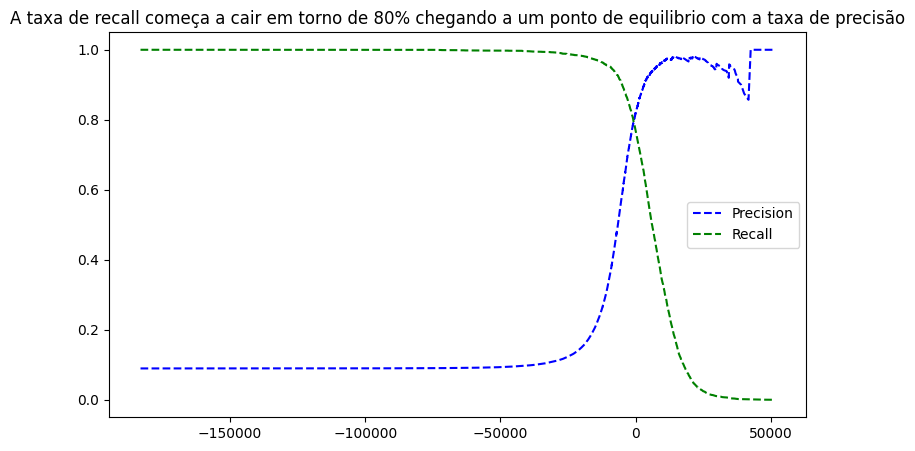

In [35]:
def plot_precision_recall_x_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(9, 5))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
  plt.legend()
  plt.title('A taxa de recall começa a cair em torno de 80% chegando a um ponto de equilibrio com a taxa de precisão')
  

plot_precision_recall_x_threshold(precisions, recalls, thresholds)





## Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma medida de desempenho de um modelo de classificação binária. Ela é obtida plotando a taxa de verdadeiros positivos (TPR) em função da taxa de falsos positivos (FPR), para diferentes valores de limiar de classificação.

A TPR é definida como a proporção de exemplos positivos corretamente classificados pelo modelo, em relação ao total de exemplos positivos. O FPR é definido como a proporção de exemplos negativos incorretamente classificados como positivos pelo modelo, em relação ao total de exemplos negativos.

A curva ROC mostra a relação entre a sensibilidade (TPR) e a especificidade (1 - FPR) do modelo em diferentes limiares de classificação. A área sob a curva ROC (AUC-ROC) é uma medida agregada de desempenho do modelo, que varia entre 0.5 (classificação aleatória) e 1 (classificação perfeita). Quanto maior a AUC-ROC, melhor o desempenho do modelo em discriminar entre as duas classes.

A curva ROC é amplamente utilizada em problemas de classificação binária, especialmente em casos em que as classes são desbalanceadas. Ela permite avaliar o desempenho do modelo em diferentes limiares de classificação e escolher o limiar mais adequado de acordo com a aplicação específica.

In [36]:
from sklearn.metrics import roc_curve


In [37]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

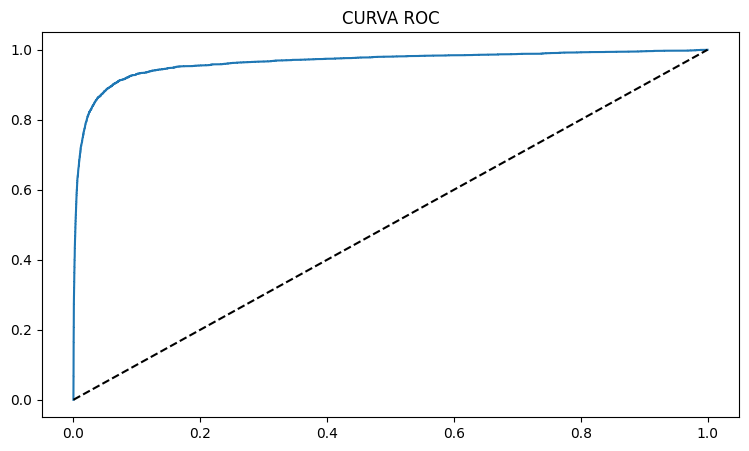

In [38]:
def plot_curva_roc(fpr, tpr, label = None):
  plt.figure(figsize=(9, 5))
  plt.plot(fpr, tpr, label=label)
  plt.plot([0,1],[0,1], "k--")
 
  plt.title('CURVA ROC')
  

plot_curva_roc(fpr, tpr)

### Score AUC

In [39]:
from sklearn.metrics import roc_auc_score

#### AUC (Area sob a curva) - o ideal é chegar próximo de 1

In [40]:
roc_auc_score(y_train_5, y_scores)

0.9644408219519376

## Classificador Random Forest

RandomForestClassifier é um algoritmo de aprendizado de máquina supervisionado utilizado para a classificação de dados. Ele se baseia na construção de múltiplas árvores de decisão, onde cada árvore é construída a partir de um subconjunto aleatório dos dados de treinamento e um subconjunto aleatório das características (ou variáveis) disponíveis.

O algoritmo opera dividindo repetidamente o conjunto de dados em subconjuntos menores e mais simples, de acordo com as características mais discriminativas dos dados. Cada subconjunto é utilizado para construir uma árvore de decisão, que é uma estrutura de decisão hierárquica composta por nós de decisão e nós de folha. Os nós de decisão testam os valores de uma ou mais características para determinar qual caminho seguir na árvore, enquanto os nós de folha representam as classes ou rótulos de saída para as instâncias classificadas.

Uma vez construídas as árvores, o algoritmo combina as classificações de todas as árvores para produzir a classe final de uma nova instância. Isso é feito através de uma votação majoritária, onde a classe mais frequente em todas as árvores é escolhida como a classe final da instância.

O RandomForestClassifier é muito utilizado em problemas de classificação em que há muitas características e muitos dados, pois ele é capaz de lidar com grandes quantidades de dados e com características altamente correlacionadas. Além disso, ele é capaz de lidar com dados faltantes e de trabalhar com dados categóricos e numéricos.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest_clf = RandomForestClassifier(random_state= 42)

In [43]:
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5, cv = 3, method = "predict_proba")
# Ele calcula a probabilidade de pertencer a cada classe com base nas características da instância de entrada.

In [44]:
 y_probas_forest

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [45]:
y_scores_forest = y_probas_forest[:,1] # probabilidade de classe positiva

In [46]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

### Plotar curva ROC

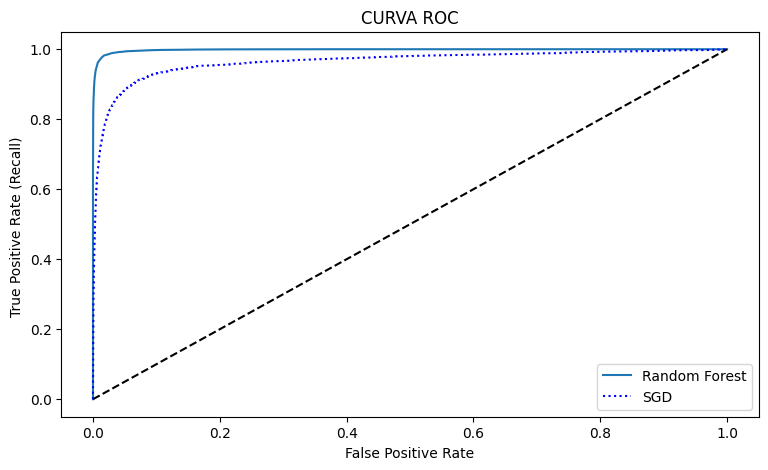

In [47]:
plot_curva_roc(fpr_forest,tpr_forest,"Random Forest")
plt.plot(fpr,tpr,"b:", label = "SGD")
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall) ')
plt.show()

# Classificação Multiclasse

## OvO x OvR

OvO (One-vs-One) e OvR (One-vs-Rest) são duas abordagens comuns para resolver problemas de classificação multi-classe usando algoritmos de aprendizado de máquina.

Na abordagem OvO, um classificador é treinado para cada par de classes possíveis. Por exemplo, se houver três classes (A, B, C), serão necessários três classificadores: um para classificar A vs. B, outro para classificar A vs. C e outro para classificar B vs. C. Durante a previsão, cada classificador é executado em paralelo e a classe com mais votos é escolhida como a classe final. O OvO é útil quando o algoritmo de classificação não é escalável com muitos exemplos de treinamento.

Na abordagem OvR, um classificador é treinado para cada classe, que é então considerado como uma classe positiva e o resto das classes é considerado como negativa. Por exemplo, se houver três classes (A, B, C), serão necessários três classificadores: um para classificar A vs. (B + C), outro para classificar B vs. (A + C) e outro para classificar C vs. (A + B). Durante a previsão, cada classificador é executado e a classe com a maior pontuação é escolhida como a classe final. O OvR é útil quando o algoritmo de classificação pode ser escalável com muitos exemplos de treinamento.

Uma vantagem do OvR é que é computacionalmente mais eficiente e é mais fácil de implementar. No entanto, pode ter problemas quando as classes não são bem separadas, e a classificação pode ser menos precisa do que o OvO. O OvO, por outro lado, tem uma vantagem em lidar com problemas de classes desbalanceadas e é geralmente mais preciso do que o OvR. No entanto, o OvO é menos eficiente computacionalmente, pois requer treinar mais classificadores.

## SVC

SVC (Support Vector Classification) é um algoritmo de aprendizado de máquina supervisionado utilizado para problemas de classificação. Ele é implementado na biblioteca Scikit-Learn (sklearn) em Python.

O SVC constrói um hiperplano (um limite de decisão) que divide o espaço de características em diferentes regiões, de acordo com as classes dos dados de treinamento. O objetivo do algoritmo é encontrar o hiperplano que maximize a distância entre as classes mais próximas (chamado de margem máxima). Isso é feito através do uso de vetores de suporte, que são as instâncias de treinamento mais próximas do hiperplano.

O SVC pode lidar com dados linearmente separáveis e não separáveis através do uso de diferentes funções de kernel. Uma função de kernel transforma os dados de entrada em um espaço de dimensão superior, onde é mais provável que sejam linearmente separáveis. As funções de kernel comuns incluem a linear, a polinomial e a RBF (Radial Basis Function).

Além disso, o SVC também permite o uso de pesos para lidar com dados desbalanceados e a definição de parâmetros de regularização para evitar overfitting.


In [48]:
from sklearn.svm import SVC

In [49]:
svm_clf = SVC()

In [50]:
svm_clf.fit(X_train,y_train)

SVC()

In [51]:
some_digit_array = some_digit.values
svm_clf.predict(some_digit_array)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

### Cross Validation

In [52]:
cross_val_score(svm_clf,X_train,y_train, cv = 3, scoring = "accuracy")

array([0.97557243, 0.97422396, 0.97440764])

In [53]:
### Escalonamento para tentar melhorar a acuracia

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [57]:
# Nesse caso não surtiu efeito o escalonamento
cross_val_score(svm_clf,X_train_scaled,y_train, cv = 3, scoring = "accuracy")

array([0.95861393, 0.96038695, 0.95787669])

### Análise de Erro

In [58]:
y_train_pred = cross_val_predict(svm_clf,X_train,y_train, cv = 3)

In [59]:
conf_mx = confusion_matrix(y_train, y_train_pred)

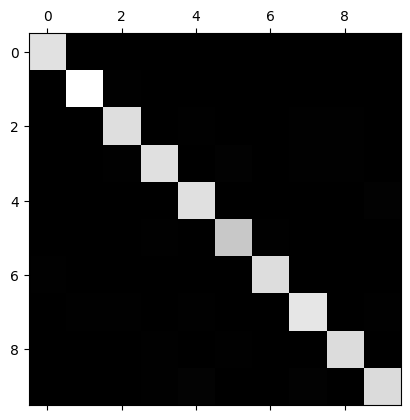

In [60]:
plt.matshow(conf_mx , cmap = plt.cm.gray)
plt.show()

### Desenho na previsão como exemplos digitos 3 e 5

In [61]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

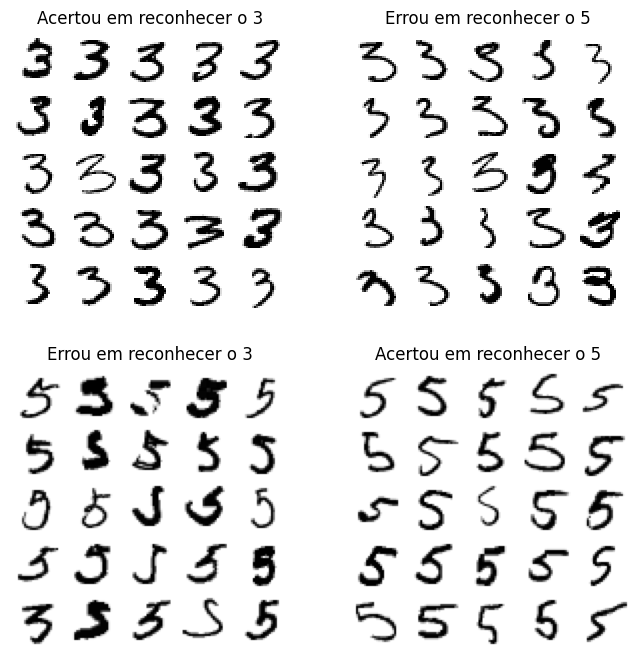

In [62]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instance).reshape(size,size) if isinstance(instance, str) else instance.reshape(size,size) for instance in instances]

    if images_per_row == 0:
       images_per_row = 0.1
    else:
        images_per_row = images_per_row
        pass

    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(np.array(X_aa[:25]), images_per_row=5)
plt.title('Acertou em reconhecer o 3')
plt.subplot(222); plot_digits(np.array(X_ab[:25]), images_per_row=5)
plt.title('Errou em reconhecer o 5')
plt.subplot(223); plot_digits(np.array(X_ba[:25]), images_per_row=5)
plt.title('Errou em reconhecer o 3')
plt.subplot(224); plot_digits(np.array(X_bb[:25]), images_per_row=5)
plt.title('Acertou em reconhecer o 5')
plt.show()

# Classificação Multirrótulo

A classificação multirrótulo é uma técnica de aprendizado de máquina que envolve a atribuição de múltiplas etiquetas (ou rótulos) para cada instância em um conjunto de dados. Em outras palavras, em vez de uma única etiqueta ou classe, cada instância pode ter várias etiquetas associadas a ela.

Por exemplo, se estamos tentando classificar imagens de animais em um zoológico, podemos ter várias etiquetas para cada imagem, indicando quais animais estão presentes na imagem. Uma imagem pode ser rotulada como contendo um leão, um elefante e um rinoceronte, enquanto outra pode ser rotulada como contendo apenas um leão.

A classificação multirrótulo é útil em situações em que as instâncias podem ter mais de uma característica ou atributo. Por exemplo, se estamos tentando prever os medicamentos que um paciente pode precisar com base em suas condições médicas, cada paciente pode ter várias condições médicas que requerem diferentes medicamentos.

Existem vários algoritmos de aprendizado de máquina que podem ser usados para a classificação multirrótulo, como o método de árvore de decisão, o k-Nearest Neighbors (k-NN), o Naive Bayes e o Random Forest. O desafio na classificação multirrótulo é determinar quais etiquetas devem ser atribuídas a cada instância, e a escolha do algoritmo depende do tipo de dados que estamos lidando e dos objetivos do problema em questão.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
y_train_large = (y_train >=7) #algorismo maior que 7
y_train_odd = (y_train % 2 == 1) # Algorismo impar
y_multilabel = np.c_[y_train_large,y_train_odd]

In [65]:
knn_clf = KNeighborsClassifier()

In [66]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [67]:
knn_clf.predict(some_digit_array) # Nesse caso o 5 é menor menor que 7 e é impar, acertou!

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

### Score

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

# Utilizaremos o F1

f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.9748370741124373

# Classificação Multioutput

A classificação multioutput é um tipo de tarefa de aprendizado de máquina supervisionado em que o modelo deve prever várias saídas para um conjunto de entradas. Em outras palavras, é um problema de classificação em que cada instância pode ter mais de uma classe de destino.

Por exemplo, imagine um modelo que recebe imagens de roupas como entrada e deve prever não apenas o tipo de roupa (camisa, calça, sapato, etc.), mas também sua cor. Nesse caso, o modelo precisa prever duas saídas diferentes: a classe da peça de roupa e a cor da peça de roupa. Esse é um exemplo de um problema de classificação multioutput.

Essa tarefa pode ser abordada por meio de várias técnicas de aprendizado de máquina, como regressão logística multivariada, árvores de decisão ou redes neurais. A escolha do algoritmo dependerá das características do problema específico, incluindo o número de saídas, o tamanho do conjunto de dados e a complexidade do modelo desejado.

O modelo abaixo irá remover o ruído das imagens, ele terá na entrada uma imagem de algorismo com ruíd e gerará uma saida de uma imagem do algorismo mais limpo.


In [81]:
# criando o ruído com base nos dados MNIST
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+ noise

y_train_mod = X_train
y_test_mod = X_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


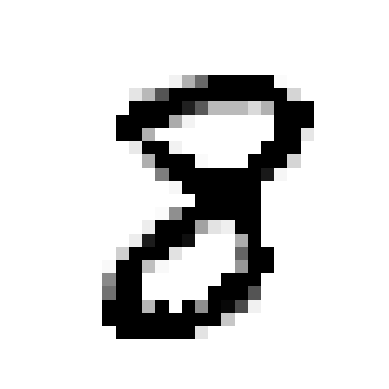

In [82]:
# Classificador knn
some_index = 0
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])
plot_digits(clean_digit)